In [1]:
from keras.models import Model, Sequential, model_from_json
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.preprocessing.image import load_img, save_img, img_to_array,ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy.misc import imresize
import os
import PIL
from skimage.transform import resize
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


In [3]:
def instantiate_model(i):
    """Instantiates the model VGG model. 
    Removes the last layer and adds a new final Dense(2) layer.
    Sets the last i layers as trainable, and fixes the others. """
    
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    model.load_weights('vgg_face_weights.h5')
    
    hidden = Dense(120, activation='relu')(model.layers[-2].output)
    out = Dense(2, activation='softmax')(hidden)
    model2 = Model(input=model.layers[0].input, output=out)
    model = model2
    layer_count = 0
    for layer in model.layers:
        layer_count = layer_count+1
    print(layer_count)
    for l in range(layer_count):
        model.layers[l].trainable=True
    for l in range(layer_count-i):
        model.layers[l].trainable=False

    return model

In [5]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [6]:
def verifyFace(img1, img2):
    """Compares 2 faces: img1 and img2"""
    img1_representation = vgg_face_descriptor.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("Cosine similarity: ",cosine_similarity)
    print("Euclidean distance: ",euclidean_distance)
    
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

In [ ]:
def plot_image(image):
    """Displays image"""
    image = np.clip(image, 0.0, 255.0)
    image = image.astype(np.uint8)
    display(PIL.Image.fromarray(image))
    
def resize_im(im,sq):
    """Resize image to 224x224"""
    width,height,col = im.shape
    assert width == height    
    if width != sq:
        #im_out = imresize(im, (sq,sq,col), interp='bilinear', mode=None)
        im_out = resize(im, (sq,sq,col))
    else:
        im_out = im
    return im_out

def getXY(path,sq=224):
    """Gets the images from path, for AJ and PJ.
    Returns X and Y to be fit to model.
    X is ndarray = (# images) x 224 x 224 x 3
    Y is ndarray = (# images) x 2 """
    
    path_to_dataPJ = path + 'PJ/'
    path_to_dataAJ = path + 'AJ/'
    PJfiles = os.listdir(path_to_dataPJ)
    AJfiles = os.listdir(path_to_dataAJ)
    trainy = []
    num_images = 0
    for i in range(len(PJfiles)):
        if PJfiles[i] == '.DS_Store':
            continue
        num_images += 1
    for i in range(len(AJfiles)):
        if AJfiles[i] == '.DS_Store':
            continue
        num_images += 1
    print(path,' Number of images: ',num_images)
    trainX = np.ndarray([num_images,sq,sq,3])
    counter=0
    for i in range(len(PJfiles)):        
        tmp_file = path_to_dataPJ + PJfiles[i]
        if PJfiles[i] == '.DS_Store':
            continue
        tmp = imread(tmp_file)      
        tmp2 = resize_im(tmp,sq)
        trainX[counter,:,:,:] = tmp2[:,:,:3]
        counter += 1
        trainy.append(1)

    for i in range(len(AJfiles)):        
        tmp_file = path_to_dataAJ + AJfiles[i]
        if AJfiles[i] == '.DS_Store':
            continue
        tmp = imread(tmp_file)
        tmp2 = resize_im(tmp,sq)
        trainX[counter,:,:,:] = tmp2[:,:,:3]
        counter += 1
        trainy.append(0)
        
    Y = to_categorical(trainy)
    X = trainX.reshape(num_images,sq,sq,3)
    print('Done importing images from ... ',path)
    return X, Y

In [ ]:
# Compare faces
epsilon = 0.40
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
#verifyFace("1.jpg", "2.jpg")

In [8]:
model = instantiate_model(5)
#model.summary()

In [14]:
path_training = 'Training/'
path_testing = 'Testing/'
trainX, trainY = getXY(path_training)
testX, testY = getXY(path_testing)    

Training/ 172


/Users/Anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


Testing/ 24
Done importing images...


In [278]:
#from keras.datasets import mnist
#download mnist data and split into train and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [244]:
file_save = 'twinmodel5.h5'
if os.path.isfile(file_save) == False:    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(trainX, trainY, batch_size=32, epochs=50)
    model.save(file_save)
else:
    model = load_model(file_save)

Epoch 1/50
172/172 [==============================] - 178s 1s/step - loss: 5.5437 - acc: 0.5756
Epoch 2/50
172/172 [==============================] - 122s 712ms/step - loss: 1.8618 - acc: 0.8663
Epoch 3/50
172/172 [==============================] - 126s 732ms/step - loss: 1.8987 - acc: 0.8721
Epoch 4/50
172/172 [==============================] - 115s 670ms/step - loss: 1.7268 - acc: 0.8837
Epoch 5/50
172/172 [==============================] - 115s 670ms/step - loss: 0.9915 - acc: 0.9186
Epoch 6/50
172/172 [==============================] - 121s 704ms/step - loss: 1.1781 - acc: 0.9244
Epoch 7/50
172/172 [==============================] - 120s 697ms/step - loss: 1.2299 - acc: 0.9070
Epoch 8/50
172/172 [==============================] - 117s 683ms/step - loss: 0.9853 - acc: 0.9360
Epoch 9/50
172/172 [==============================] - 122s 707ms/step - loss: 1.5397 - acc: 0.9012
Epoch 10/50
172/172 [==============================] - 124s 722ms/step - loss: 1.0308 - acc: 0.9360
Epoch 11/50


In [323]:
test_predY = model.predict(testX[:])[:,1]
train_predY = model.predict(trainX[:])[:,1]
test_predY2 = test_predY.astype(int)
testY2 = testY[:,1].astype(int)
train_predY2 = train_predY.astype(int)
trainY2 = trainY[:,1].astype(int)

In [324]:
#list(zip(test_predY2,testY2))

In [16]:
def show_errors(predY, trueY,X):
    cm = confusion_matrix(trueY,predY)
    print(cm)
    c = 0
    names = ['Anthony','Paul']
    for i,j in list(zip(predY,trueY)):
        if i != j:
            print('Mistake! Thinks ',names[trueY[c]],' is ',names[predY[c]])
            plot_image(X[c])
        c += 1  

Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


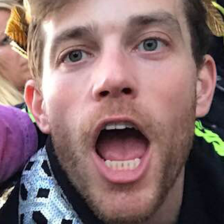

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


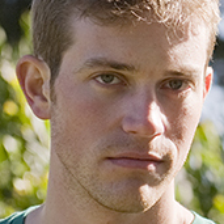

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


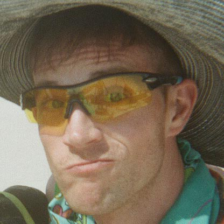

Mistake! Thinks  Paul  is  Anthony


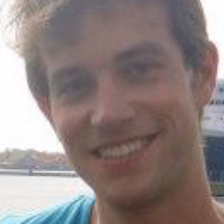

Mistake! Thinks  Paul  is  Anthony


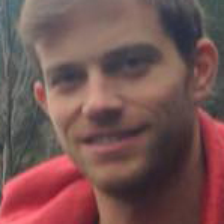

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


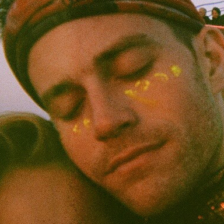

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


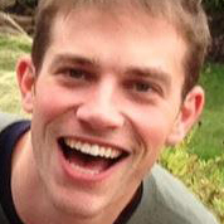

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


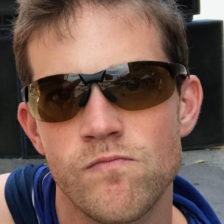

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


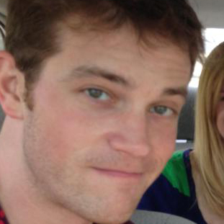

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


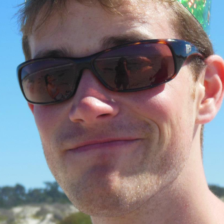

Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


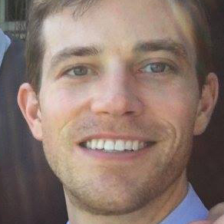

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


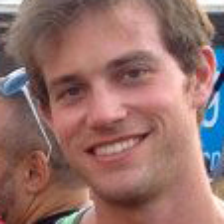

Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


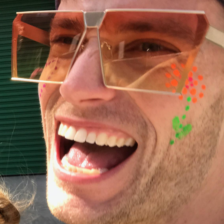

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


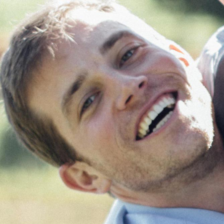

Success! Thinks  Paul  is  Paul
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  A

In [332]:
# Train data
show_errors(train_predY2,trainY2,trainX)

Mistake! Thinks  Paul  is  Anthony


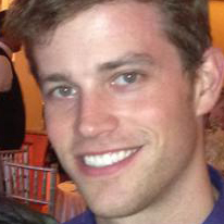

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Mistake! Thinks  Paul  is  Anthony


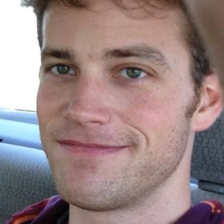

Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Paul  is  Paul
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Mistake! Thinks  Anthony  is  Paul


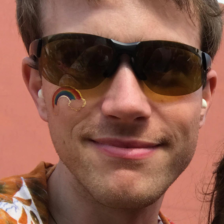

Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony
Success! Thinks  Anthony  is  Anthony


In [334]:
# Test data
show_errors(test_predY2,testY2,testX)

In [329]:
score_train = accuracy_score(trainY2,train_predY2)
score_test = accuracy_score(testY2,test_predY2)
print('Training score: ',score_train, ' , Testing score:',score_test)

0.875

In [ ]:
# Try setting more or less layers to untrainable.
for i in [4,5,6,7,8,9]:
    file_save = 'twinmodel' + str(i) + '.h5'
    print(file_save)
    if os.path.isfile(file_save) == False:
        model = instantiate_model(i)
        model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
        model.fit(trainX, trainY, batch_size=32, epochs=50)
        
        model.save(file_save)
    else:
        model = load_model(file_save)
    
    test_predY = model.predict(testX[:])[:,1]
    train_predY = model.predict(trainX[:])[:,1]
    
    test_predY2 = test_predY.astype(int)
    testY2 = testY[:,1].astype(int)
    train_predY2 = train_predY.astype(int)
    trainY2 = trainY[:,1].astype(int)
    score_train = accuracy_score(trainY2,train_predY2)
    score_test = accuracy_score(testY2,test_predY2)
    print('Training score: ',score_train, ' , Testing score:',score_test)

twinmodel4.h5


/Users/Anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ze..., outputs=Tensor("de...)`


40
Epoch 1/50
172/172 [==============================] - 152s 885ms/step - loss: 4.0021 - acc: 0.6744
Epoch 2/50
172/172 [==============================] - 149s 868ms/step - loss: 3.4786 - acc: 0.7616
Epoch 3/50
172/172 [==============================] - 151s 877ms/step - loss: 5.3700 - acc: 0.6628
Epoch 4/50
172/172 [==============================] - 149s 866ms/step - loss: 4.4358 - acc: 0.7209
Epoch 5/50
172/172 [==============================] - 158s 918ms/step - loss: 2.6372 - acc: 0.8314
Epoch 6/50
172/172 [==============================] - 135s 786ms/step - loss: 2.3743 - acc: 0.8488
Epoch 7/50
172/172 [==============================] - 145s 845ms/step - loss: 2.1615 - acc: 0.8605
Epoch 8/50
172/172 [==============================] - 136s 789ms/step - loss: 2.3895 - acc: 0.8488
Epoch 9/50
172/172 [==============================] - 133s 773ms/step - loss: 1.9679 - acc: 0.8779
Epoch 10/50
172/172 [==============================] - 137s 795ms/step - loss: 1.7594 - acc: 0.8895
Epoch 